In [80]:
import pandas as pd
import numpy as np

In [210]:
data_train = pd.read_csv('../raw_data/train.csv')

In [211]:
data_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# Data Preprocessing

In [212]:
data_train.shape

(8693, 14)

In [213]:
data_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [214]:
data_train.dtypes.value_counts()

object     7
float64    6
bool       1
dtype: int64

## Feature Engineering

In [215]:
data_train[['Cabin_deck', 'Cabin_num', 'Cabin_side']] = data_train['Cabin'].str.split('/', expand=True)

In [216]:
data_train = data_train.drop(columns = 'Cabin')

In [217]:
data_train

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_deck,Cabin_num,Cabin_side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,98,P
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,1499,S
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,1500,S
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,608,S


In [218]:
data_train.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
Cabin_deck         8
Cabin_num       1817
Cabin_side         2
dtype: int64

In [219]:
data_train.Cabin_num = data_train.Cabin_num.astype(float)

In [220]:
data_train

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_deck,Cabin_num,Cabin_side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0.0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0.0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0.0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0.0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1.0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,98.0,P
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,1499.0,S
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,1500.0,S
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,608.0,S


In [517]:
data_train['PassengerGroup'] = data_train.PassengerId.apply(lambda x: int(x.split('_')[0]))
data_train['PassengerNumber'] = data_train.PassengerId.apply(lambda x: int(x.split('_')[1]))

In [518]:
data_train

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_deck,Cabin_num,Cabin_side,PassengerGroup,PassengerNumber
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0.0,P,1,1
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0.0,S,2,1
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0.0,S,3,1
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0.0,S,3,2
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1.0,S,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,98.0,P,9276,1
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,1499.0,S,9278,1
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,1500.0,S,9279,1
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,608.0,S,9280,1


In [519]:
data_train = data_train.drop(columns = 'PassengerId')

In [527]:
def fill_age(df, age_limit = 13):
    data_train['RoomService'] = np.where(data_train['Age'] < age_limit, 0, data_train['RoomService'])
    data_train['FoodCourt'] = np.where(data_train['Age'] < age_limit, 0, data_train['FoodCourt'])
    data_train['ShoppingMall'] = np.where(data_train['Age'] < age_limit, 0, data_train['ShoppingMall'])
    data_train['Spa'] = np.where(data_train['Age'] < age_limit, 0, data_train['Spa'])
    data_train['VRDeck'] = np.where(data_train['Age'] < age_limit, 0, data_train['VRDeck'])
    
    return data_train

In [528]:
data_train = fill_age(data_train)

In [529]:
data_train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_deck,Cabin_num,Cabin_side,PassengerGroup,PassengerNumber
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0.0,P,1,1
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0.0,S,2,1
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0.0,S,3,1
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0.0,S,3,2
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1.0,S,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,98.0,P,9276,1
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,1499.0,S,9278,1
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,1500.0,S,9279,1
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,608.0,S,9280,1


In [530]:
duplicate_count = data_train.duplicated().sum()

In [531]:
(data_train.isnull().sum()/len(data_train))*100

HomePlanet         2.312205
CryoSleep          2.496261
Destination        2.093639
Age                2.059128
VIP                2.335212
RoomService        1.852065
FoodCourt          1.967100
ShoppingMall       2.162660
Spa                1.944093
VRDeck             1.886575
Name               2.300702
Transported        0.000000
Cabin_deck         2.289198
Cabin_num          2.289198
Cabin_side         2.289198
PassengerGroup     0.000000
PassengerNumber    0.000000
dtype: float64

In [532]:
cat_types = data_train.select_dtypes(include='object').nunique()

In [533]:
cat_types

HomePlanet        3
CryoSleep         2
Destination       3
VIP               2
Name           8473
Cabin_deck        8
Cabin_side        2
dtype: int64

In [534]:
cat_types_small =  list(cat_types[cat_types < 10].index)

In [535]:
cat_types_small

['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Cabin_deck', 'Cabin_side']

In [536]:
data_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_num,PassengerGroup,PassengerNumber
count,8514.000000,8532.000000,8522.000000,8505.000000,8524.000000,8529.000000,8494.000000,8693.000000,8693.000000
mean,28.827930,224.160924,457.432176,173.320635,310.627757,303.996952,600.367671,4633.389624,1.517773
std,14.489021,666.024331,1610.445743,604.043588,1135.841454,1144.217855,511.867226,2671.028856,1.054241
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,167.250000,2319.000000,1.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,427.000000,4630.000000,1.000000
75%,38.000000,46.000000,76.000000,26.000000,59.000000,45.000000,999.000000,6883.000000,2.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1894.000000,9280.000000,8.000000


# Basline Model

In [225]:
from scipy import stats

# sklearn preproc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import make_scorer

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor

In [226]:
X_train = data_train.drop(columns = ['Transported'])

In [228]:
X_train = X_train.drop(columns = ['PassengerId'])

In [229]:
y_train = data_train.Transported

In [230]:
y_train = y_train.astype(int)

In [231]:
y_train

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 8693, dtype: int64

In [232]:
preproc_numerical_baseline = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler())

preproc_categorical_baseline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preproc_baseline = make_column_transformer(
    (preproc_numerical_baseline, make_column_selector(dtype_include=['float64'])),
    (preproc_categorical_baseline, cat_types_small),
    remainder="drop")

preproc_baseline

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x1564bd7f0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['HomePlanet', 'CryoSleep', 'Destination',
                                  'VIP', 'Cabin_deck', 'Cabin_side'])])

In [233]:
from sklearn.linear_model import LogisticRegression


In [234]:
pipe_baseline = make_pipeline(preproc_baseline,LogisticRegression(max_iter = 1000))
pipe_baseline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x1564bd7f0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['HomePlanet', 'CryoSleep',
                                                   'Destination', 'VIP',
                                                   'Cabin_deck',
                                                   'Cabin_side'])])),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [235]:
score_baseline = cross_val_score(pipe_baseline, X_train, y_train, cv=5, scoring='accuracy').mean()
score_baseline

0.7848842403111188

## Predict the baseline model

In [271]:
test_data = pd.read_csv('../raw_data/test.csv')

In [151]:
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [152]:
X_test_id = test_data['PassengerId']

In [153]:
X_test = test_data.drop(columns = 'PassengerId')

In [154]:
pipe_baseline.fit(X_train,y_train)
y_pred_baseline = pipe_baseline.predict(X_test)
y_predict  =  y_pred_baseline.astype(bool)

In [155]:
y_predict.shape

(4277,)

In [156]:
results = pd.concat([X_test_id, pd.Series(y_predict, name="Transported")], axis=1)
results.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [157]:
# Export to Kaggle format submission in the `data` folder
results.to_csv("../raw_data/submission_baseline04.csv", header=True, index=False)

# Fine tuning the model

## Fine tuning the model 01

In [129]:
from sklearn.ensemble import RandomForestClassifier

In [148]:
pipe_model1 = make_pipeline(preproc_baseline,RandomForestClassifier())
pipe_model1

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x156229e50>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['HomePlanet', 'CryoSleep',
                                                   'Destination', 'VIP'])])),
                ('randomforestclassifier', RandomForestClassifier())])

In [149]:
score_model1 = cross_val_score(pipe_model1, X_train, y_train, cv=5, scoring='accuracy').mean()
score_model1

0.7824693238644221

In [142]:
pipe_model1.fit(X_train,y_train)
y_pred_pipe_model1 = pipe_model1.predict(X_test)
y_predict_model1  =  y_pred_pipe_model1.astype(bool)

In [143]:
results_model1 = pd.concat([X_test_id, pd.Series(y_predict_model1, name="Transported")], axis=1)
results_model1.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False


In [144]:
results_model1.to_csv("../raw_data/submission_baseline03.csv", header=True, index=False)

## Fine tuning the model 02

In [161]:
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier

model02 = StackingClassifier(
    estimators = [("rf", RandomForestClassifier()),
                  ("knn", KNeighborsClassifier(n_neighbors=10))],
    final_estimator = LogisticRegression())

In [162]:
pipe_model2 = make_pipeline(preproc_baseline,model02)

In [163]:
c

0.7797087198110629

In [166]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [167]:
model3 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),
                               n_estimators=50)    

In [169]:
pipe_model3 = make_pipeline(preproc_baseline,model3)

In [170]:
score_model3 = cross_val_score(pipe_model3, X_train, y_train, cv=5, scoring='accuracy').mean()
score_model3

0.77280767288847

## Fine tuning the model 03

In [175]:
from sklearn.feature_selection import SelectPercentile, mutual_info_regression

In [500]:
# encoder_ordinal = OrdinalEncoder(
#     categories=feat_ordinal_values_sorted,
#     dtype= np.int64,
#     handle_unknown="use_encoded_value",
#     unknown_value=-1 # Considers unknown values as worse than "missing"
# )

preproc_ordinal = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
#     encoder_ordinal,
    OneHotEncoder(handle_unknown="ignore"),
    StandardScaler()
    )

preproc_numerical = make_pipeline(
    KNNImputer(),
    StandardScaler()
)

preproc_transformer = make_column_transformer(
    (preproc_numerical, make_column_selector(dtype_include=["float64"])),
    (preproc_categorical_baseline, cat_types_small),
    remainder="drop")

# preproc_selector = SelectPercentile(
#     mutual_info_regression,
#     percentile=70, # keep only xx% of all features )
# # )
# preproc = make_pipeline(
#     preproc_transformer,
#     preproc_selector
# )
# preproc
preproc_transformer

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('knnimputer', KNNImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x18337b0a0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['HomePlanet', 'CryoSleep', 'Destination',
                                  'VIP', 'Cabin_deck', 'Cabin_side'])])

In [186]:
from tempfile import mkdtemp
from shutil import rmtree
cachedir = mkdtemp()

In [486]:
pipe_model04 = make_pipeline(preproc,model02,memory=cachedir)
pipe_model04

Pipeline(memory='/var/folders/4y/7vss76ld1rj1ybqx7xpskc5m0000gn/T/tmpm7tszrge',
         steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('pipeline-1',
                                                                   Pipeline(steps=[('knnimputer',
                                                                                    KNNImputer()),
                                                                                   ('standardscaler',
                                                                                    StandardScaler())]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x1563e2220>),
                                                                  ('pipeli...
                                                                   ['HomePlanet',
                                                                    'CryoSleep',
                                                                    'Destination',
                                                                    'VIP',
                                                                    'Cabin_deck',
                                                                    'Cabin_side'])])),
                                 ('selectpercentile',
                                  SelectPercentile(percentile=70,
                                                   score_func=<function mutual_info_regression at 0x156416dc0>))])),
                ('stackingclassifier',
                 StackingClassifier(estimators=[('rf',
                                                 RandomForestClassifier()),
                                                ('knn',
                                                 KNeighborsClassifier(n_neighbors=10))],
                                    final_estimator=LogisticRegression()))])

In [487]:
score_model4 = cross_val_score(pipe_model04, X_train, y_train, cv=5, scoring='accuracy').mean()
score_model4

0.788915431603285

In [182]:
pipe_model04.fit(X_train,y_train)
y_pred_pipe_model4 = pipe_model04.predict(X_test)
y_predict_model4 = y_pred_pipe_model4.astype(bool)

In [183]:
results_model4 = pd.concat([X_test_id, pd.Series(y_predict_model4, name="Transported")], axis=1)

In [184]:
results_model4.to_csv("../raw_data/submission_baseline05.csv", header=True, index=False)

## Fine tuning the model 04

In [385]:
from sklearn.svm import SVC

In [386]:
model5 = SVC()

In [389]:
pipe_model05 = make_pipeline(preproc,model5,memory=cachedir)

In [390]:
score_model5 = cross_val_score(pipe_model05, X_train, y_train, cv=5, scoring='accuracy').mean()
score_model5

0.7925943179915709

## Fine tuning the model 05(deep learning)

In [488]:
X_train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Cabin_deck,Cabin_num,Cabin_side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,B,0.0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,F,0.0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,A,0.0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,A,0.0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,F,1.0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,A,98.0,P
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,G,1499.0,S
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,G,1500.0,S
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,E,608.0,S


In [540]:
X_train = data_train.drop(columns = ['Transported'])

In [545]:
X_train_scaled = preproc_baseline.fit_transform(X_train)

In [547]:
X_train_scaled.shape

(8693, 27)

In [544]:
X_train.shape

(8693, 16)

In [542]:
X_train_scaled.shape[1]

27

In [246]:
X_train.shape[1]

14

In [243]:
y_train.shape

(8693,)

In [359]:
import tensorflow as tf
from tensorflow import keras

In [548]:
es = tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)

In [549]:
from tensorflow.keras import regularizers, Sequential, layers

In [550]:
reg_l1 = regularizers.L1(0.01)
reg_l2 = regularizers.L2(0.01)
reg_l1_l2 = regularizers.l1_l2(l1=0.005, l2=0.0005)

In [551]:
opt = keras.optimizers.Adam(learning_rate=0.001)
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=X_train_scaled.shape[1]))
model.add(keras.layers.Dense(20, activation='relu',kernel_regularizer=reg_l1))
model.add(keras.layers.Dense(20, activation='tanh'))

model.add(keras.layers.Dense(20, activation='relu',bias_regularizer=reg_l2))
model.add(keras.layers.Dense(20, activation='tanh'))

model.add(keras.layers.Dense(10, activation='relu',activity_regularizer=reg_l1_l2))
model.add(keras.layers.Dense(10, activation='tanh'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss ="binary_crossentropy", optimizer=opt, metrics=['accuracy'])

In [552]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_149 (Dense)            (None, 20)                560       
_________________________________________________________________
dense_150 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_151 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_152 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_153 (Dense)            (None, 10)                210       
_________________________________________________________________
dense_154 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_155 (Dense)            (None, 1)               

In [553]:
history = model.fit(X_train_scaled,
                    y_train,
                    epochs=30,
                    batch_size = 32,
                    shuffle = True,
                    validation_split=0.3,
                    verbose=1, 
                    callbacks=[es])

Epoch 1/30
191/191 [==============================] - 1s 1ms/step - loss: 1.1875 - accuracy: 0.7344 - val_loss: 0.8521 - val_accuracy: 0.7887
Epoch 2/30
191/191 [==============================] - 0s 880us/step - loss: 0.7241 - accuracy: 0.7854 - val_loss: 0.6281 - val_accuracy: 0.7983
Epoch 3/30
191/191 [==============================] - 0s 942us/step - loss: 0.5931 - accuracy: 0.7954 - val_loss: 0.6449 - val_accuracy: 0.7550
Epoch 4/30
191/191 [==============================] - 0s 913us/step - loss: 0.5463 - accuracy: 0.7910 - val_loss: 0.6269 - val_accuracy: 0.7604
Epoch 5/30
191/191 [==============================] - 0s 895us/step - loss: 0.5184 - accuracy: 0.7969 - val_loss: 0.5658 - val_accuracy: 0.7887
Epoch 6/30
191/191 [==============================] - 0s 889us/step - loss: 0.5004 - accuracy: 0.7956 - val_loss: 0.5438 - val_accuracy: 0.7857
Epoch 7/30
191/191 [==============================] - 0s 898us/step - loss: 0.4896 - accuracy: 0.7972 - val_loss: 0.5297 - val_accuracy: 0

In [554]:
import matplotlib.pyplot as plt

In [555]:
def plot_loss_accuracy(history, title=None):
    fig, ax = plt.subplots(1,2, figsize=(20,7))
    
    # --- LOSS --- 
    
    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('Model loss')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylim((0,3))
    ax[0].legend(['Train', 'Test'], loc='best')
    ax[0].grid(axis="x",linewidth=0.5)
    ax[0].grid(axis="y",linewidth=0.5)
    
    # --- ACCURACY
    
    ax[1].plot(history.history['accuracy'])
    ax[1].plot(history.history['val_accuracy'])
    ax[1].set_title('Model Accuracy')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Test'], loc='best')
    ax[1].set_ylim((0,1))
    ax[1].grid(axis="x",linewidth=0.5)
    ax[1].grid(axis="y",linewidth=0.5)
    
    if title:
        fig.suptitle(title)

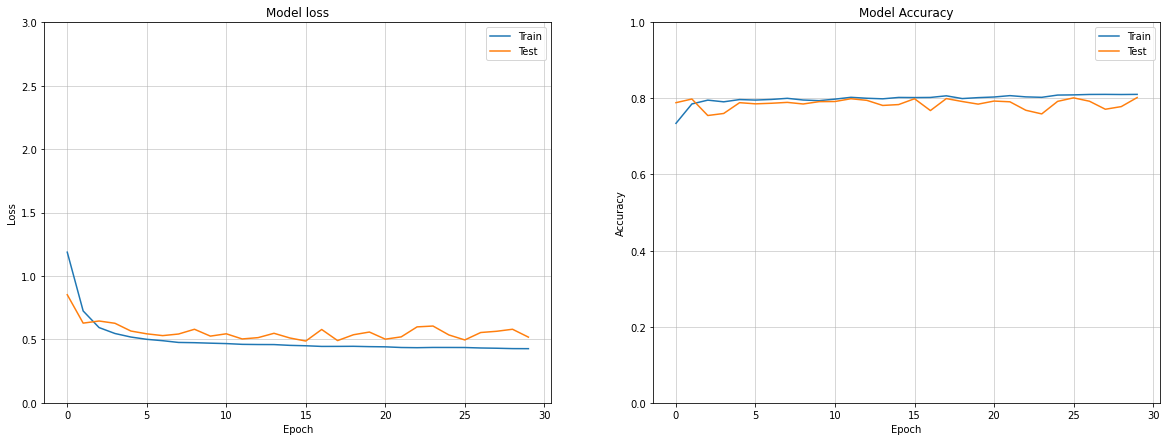

In [556]:
plot_loss_accuracy(history, title=None)

In [604]:
test_data = pd.read_csv('../raw_data/test.csv')

In [605]:
test_data.shape

(4277, 13)

In [606]:
test_data[['Cabin_deck', 'Cabin_num', 'Cabin_side']] = test_data['Cabin'].str.split('/', expand=True)

In [607]:
test_data = test_data.drop(columns = 'Cabin')

In [608]:
test_data.Cabin_num = test_data.Cabin_num.astype(float)

In [609]:
test_data['PassengerGroup'] = test_data.PassengerId.apply(lambda x: int(x.split('_')[0]))
test_data['PassengerNumber'] = test_data.PassengerId.apply(lambda x: int(x.split('_')[1]))

In [610]:
X_test = test_data.drop(columns = ['PassengerId'])

In [611]:
def fill_age_test(test_data, age_limit = 13):
    test_data['RoomService'] = np.where(test_data['Age'] < age_limit, 0, test_data['RoomService'])
    test_data['FoodCourt'] = np.where(test_data['Age'] < age_limit, 0, test_data['FoodCourt'])
    test_data['ShoppingMall'] = np.where(test_data['Age'] < age_limit, 0, test_data['ShoppingMall'])
    test_data['Spa'] = np.where(test_data['Age'] < age_limit, 0, test_data['Spa'])
    test_data['VRDeck'] = np.where(test_data['Age'] < age_limit, 0, test_data['VRDeck'])
    
    return test_data

In [612]:
X_test = fill_age_test(X_test)

In [621]:
X_test

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Cabin_deck,Cabin_num,Cabin_side,PassengerGroup,PassengerNumber
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,3.0,S,13,1
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,4.0,S,18,1
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,0.0,S,19,1
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,1.0,S,21,1
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,5.0,S,23,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,Earth,True,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,G,1496.0,S,9266,2
4273,Earth,False,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN,NaN,NaN,9269,1
4274,Mars,True,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,D,296.0,P,9271,1
4275,Europa,False,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,D,297.0,P,9273,1


In [613]:
X_test_scaled = preproc_baseline.fit_transform(X_test)

In [614]:
X_test_scaled.shape

(4277, 27)

In [615]:
predictions = model.predict(X_test_scaled).round().astype(bool)

In [616]:
predictions.shape

(4277, 1)

In [617]:
output = pd.DataFrame(predictions, columns=['Transported'])
output.insert(0,'PassengerId',test_data['PassengerId'])

In [618]:
output.shape

(4277, 2)

In [619]:
output.to_csv("../raw_data/submission_baseline14.csv", header=True, index=False)